# Part_2(Logistic_Regression)

In [ ]:
#"I certify that the code and data in this assignment were generated independently,
#using only the tools and resources defined in the course and that I (we) did not receive
#any external help, coaching or contributions during the production of this work."

In [4]:
import pandas as pd
import numpy as np

In [5]:
df2 = pd.read_csv("penguins.csv")

In [6]:
print(df2)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [7]:
df2.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [8]:
size=df2.size
print(size)

2752


In [9]:
shape=df2.shape
print(shape)

(344, 8)


In [10]:
des=df2.describe()
print(des)

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  


In [11]:
df2.isnull().sum(0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [12]:
df2.isnull().sum(1)

0      0
1      0
2      0
3      5
4      0
      ..
339    0
340    0
341    0
342    0
343    0
Length: 344, dtype: int64

In [13]:
df2.isnull().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [14]:
df2.dropna(inplace= True)

In [15]:
df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [16]:
cat = pd.Categorical(df2)

In [17]:
print(cat)

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']
Categories (8, object): ['bill_depth_mm', 'bill_length_mm', 'body_mass_g', 'flipper_length_mm', 'island', 'sex', 'species', 'year']


In [18]:
import matplotlib.pyplot as plt

In [19]:
cat_sp = pd.Categorical(df2.species)

In [20]:
cat_sp

['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', ..., 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Chinstrap']
Length: 333
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [21]:
cat_is= pd.Categorical(df2.island)

In [22]:
cat_is

['Torgersen', 'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen', ..., 'Dream', 'Dream', 'Dream', 'Dream', 'Dream']
Length: 333
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']

In [23]:
cat_sex = pd.Categorical(df2.sex)

In [24]:
cat_sex

['male', 'female', 'female', 'female', 'male', ..., 'male', 'female', 'male', 'male', 'female']
Length: 333
Categories (2, object): ['female', 'male']

In [25]:
df2['bill_length_mm'].value_counts(normalize = True)

41.1    0.021021
45.2    0.018018
39.6    0.015015
50.0    0.015015
46.5    0.015015
          ...   
54.2    0.003003
36.9    0.003003
54.3    0.003003
43.8    0.003003
43.4    0.003003
Name: bill_length_mm, Length: 163, dtype: float64

In [26]:
df2['bill_depth_mm'].value_counts(normalize = True)

17.0    0.036036
15.0    0.030030
18.6    0.030030
18.5    0.030030
17.9    0.030030
          ...   
13.6    0.003003
17.4    0.003003
20.6    0.003003
13.2    0.003003
13.3    0.003003
Name: bill_depth_mm, Length: 79, dtype: float64

In [27]:
df2['flipper_length_mm'].value_counts(normalize = True)

190.0    0.063063
195.0    0.051051
187.0    0.048048
210.0    0.042042
193.0    0.042042
191.0    0.039039
215.0    0.036036
196.0    0.030030
197.0    0.030030
185.0    0.027027
208.0    0.024024
198.0    0.024024
220.0    0.024024
189.0    0.021021
230.0    0.021021
192.0    0.021021
181.0    0.021021
184.0    0.021021
212.0    0.021021
216.0    0.018018
188.0    0.018018
213.0    0.018018
222.0    0.018018
201.0    0.018018
186.0    0.018018
199.0    0.018018
194.0    0.015015
203.0    0.015015
219.0    0.015015
214.0    0.015015
218.0    0.015015
221.0    0.015015
217.0    0.015015
209.0    0.015015
202.0    0.012012
228.0    0.012012
200.0    0.012012
178.0    0.012012
225.0    0.012012
180.0    0.012012
224.0    0.009009
182.0    0.009009
205.0    0.009009
229.0    0.006006
183.0    0.006006
207.0    0.006006
223.0    0.006006
211.0    0.006006
226.0    0.003003
174.0    0.003003
231.0    0.003003
172.0    0.003003
176.0    0.003003
206.0    0.003003
Name: flipper_length_mm, dty

In [28]:
df2['body_mass_g'].value_counts(normalize = True)

3800.0    0.036036
3700.0    0.030030
3900.0    0.030030
3950.0    0.030030
3550.0    0.027027
            ...   
5450.0    0.003003
4275.0    0.003003
5750.0    0.003003
6300.0    0.003003
3625.0    0.003003
Name: body_mass_g, Length: 93, dtype: float64

In [29]:
df2['year'].value_counts(normalize = True)

2009    0.351351
2008    0.339339
2007    0.309309
Name: year, dtype: float64

In [30]:
normalized_data_year = (df2.year - np.min(df2.year)) / (np.max(df2.year) - np.min(df2.year))

In [31]:
normalized_data_year

0      0.0
1      0.0
2      0.0
4      0.0
5      0.0
      ... 
339    1.0
340    1.0
341    1.0
342    1.0
343    1.0
Name: year, Length: 333, dtype: float64

In [32]:
normalized_data_bill_length_mm = (df2.bill_length_mm - np.min(df2.bill_length_mm)) / (np.max(df2.bill_length_mm) - np.min(df2.bill_length_mm))

In [33]:
normalized_data_bill_length_mm

0      0.254545
1      0.269091
2      0.298182
4      0.167273
5      0.261818
         ...   
339    0.861818
340    0.414545
341    0.636364
342    0.680000
343    0.658182
Name: bill_length_mm, Length: 333, dtype: float64

In [34]:

normalized_data_bill_depth_mm = (df2.bill_depth_mm - np.min(df2.bill_depth_mm)) / (np.max(df2.bill_depth_mm) - np.min(df2.bill_depth_mm))

In [35]:
normalized_data_bill_depth_mm

0      0.666667
1      0.511905
2      0.583333
4      0.738095
5      0.892857
         ...   
339    0.797619
340    0.595238
341    0.607143
342    0.702381
343    0.666667
Name: bill_depth_mm, Length: 333, dtype: float64

In [36]:
normalized_data_flipper_length_mm = (df2.flipper_length_mm - np.min(df2.flipper_length_mm)) / (np.max(df2.flipper_length_mm) - np.min(df2.flipper_length_mm))

In [37]:
normalized_data_flipper_length_mm

0      0.152542
1      0.237288
2      0.389831
4      0.355932
5      0.305085
         ...   
339    0.593220
340    0.508475
341    0.355932
342    0.644068
343    0.440678
Name: flipper_length_mm, Length: 333, dtype: float64

In [38]:
normalized_data_body_mass_g = (df2.body_mass_g - np.min(df2.body_mass_g)) / (np.max(df2.body_mass_g) - np.min(df2.body_mass_g))

In [39]:
normalized_data_body_mass_g

0      0.291667
1      0.305556
2      0.152778
4      0.208333
5      0.263889
         ...   
339    0.361111
340    0.194444
341    0.298611
342    0.388889
343    0.298611
Name: body_mass_g, Length: 333, dtype: float64

In [40]:
numerical = df2.select_dtypes(exclude=['object'])
categorical=df2.select_dtypes(include=['object'])

In [41]:
numerical.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,39.1,18.7,181.0,3750.0,2007
1,39.5,17.4,186.0,3800.0,2007
2,40.3,18.0,195.0,3250.0,2007
4,36.7,19.3,193.0,3450.0,2007
5,39.3,20.6,190.0,3650.0,2007


In [42]:
categorical.head()

,species,island,sex
0,Adelie,Torgersen,male
1,Adelie,Torgersen,female
2,Adelie,Torgersen,female
4,Adelie,Torgersen,female
5,Adelie,Torgersen,male


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
penguins_data=pd.read_csv('penguins.csv')

In [45]:
len(penguins_data)

344

In [46]:
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [47]:
penguins_data.index

RangeIndex(start=0, stop=344, step=1)

In [48]:
penguins_data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [49]:
penguins_data.info

<bound method DataFrame.info of        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g   

In [50]:
penguins_data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [51]:
penguins_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


<AxesSubplot:xlabel='sex', ylabel='count'>

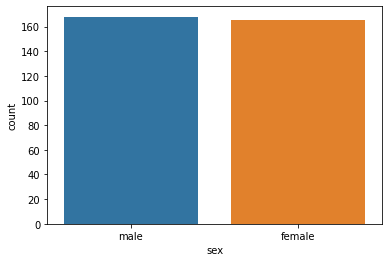

In [52]:
sns.countplot(x='sex',data=penguins_data)

<AxesSubplot:xlabel='sex', ylabel='count'>

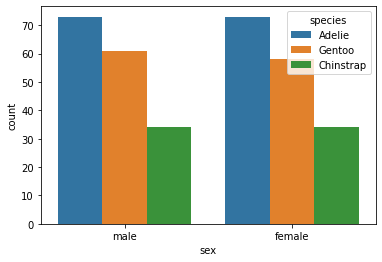

In [53]:
sns.countplot(x='sex',data=penguins_data,hue='species')

In [54]:
penguins_data.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


In [55]:
penguins_data.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [56]:
penguins_data.dropna(inplace= True)

In [57]:
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [58]:
penguins_data.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [59]:
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [60]:
penguins_data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [61]:
gender=pd.get_dummies(penguins_data['sex'],drop_first=True)

In [62]:
penguins_data['gender']= gender

In [63]:
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1


In [64]:
penguins_data.drop(['species','sex','island'],axis=1,inplace=True)

In [65]:
penguins_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,gender
0,39.1,18.7,181.0,3750.0,2007,1
1,39.5,17.4,186.0,3800.0,2007,0
2,40.3,18.0,195.0,3250.0,2007,0
4,36.7,19.3,193.0,3450.0,2007,0
5,39.3,20.6,190.0,3650.0,2007,1
...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,1
340,43.5,18.1,202.0,3400.0,2009,0
341,49.6,18.2,193.0,3775.0,2009,1
342,50.8,19.0,210.0,4100.0,2009,1


In [83]:
x=penguins_data[['bill_length_mm','bill_depth_mm','flipper_length_mm','year']].values
y=penguins_data['body_mass_g'].values

In [84]:
x_train= x[range(0,266)]
x_test= x[range(266,333)]
y_train= y[range(0,266)]
y_test= y[range(266,333)]

In [85]:
x_train

array([[  39.1,   18.7,  181. , 2007. ],
       [  39.5,   17.4,  186. , 2007. ],
       [  40.3,   18. ,  195. , 2007. ],
       ...,
       [  45.2,   14.8,  212. , 2009. ],
       [  49.9,   16.1,  213. , 2009. ],
       [  46.5,   17.9,  192. , 2007. ]])

In [86]:
y_train

array([3750., 3800., 3250., 3450., 3650., 3625., 4675., 3200., 3800.,
       4400., 3700., 3450., 4500., 3325., 4200., 3400., 3600., 3800.,
       3950., 3800., 3800., 3550., 3200., 3150., 3950., 3250., 3900.,
       3300., 3900., 3325., 4150., 3950., 3550., 3300., 4650., 3150.,
       3900., 3100., 4400., 3000., 4600., 3425., 3450., 4150., 3500.,
       4300., 3450., 4050., 2900., 3700., 3550., 3800., 2850., 3750.,
       3150., 4400., 3600., 4050., 2850., 3950., 3350., 4100., 3050.,
       4450., 3600., 3900., 3550., 4150., 3700., 4250., 3700., 3900.,
       3550., 4000., 3200., 4700., 3800., 4200., 3350., 3550., 3800.,
       3500., 3950., 3600., 3550., 4300., 3400., 4450., 3300., 4300.,
       3700., 4350., 2900., 4100., 3725., 4725., 3075., 4250., 2925.,
       3550., 3750., 3900., 3175., 4775., 3825., 4600., 3200., 4275.,
       3900., 4075., 2900., 3775., 3350., 3325., 3150., 3500., 3450.,
       3875., 3050., 4000., 3275., 4300., 3050., 4000., 3325., 3500.,
       3500., 4475.,

In [87]:
x_test

array([[  50. ,   19.5,  196. , 2007. ],
       [  51.3,   19.2,  193. , 2007. ],
       [  45.4,   18.7,  188. , 2007. ],
       [  52.7,   19.8,  197. , 2007. ],
       [  45.2,   17.8,  198. , 2007. ],
       [  46.1,   18.2,  178. , 2007. ],
       [  51.3,   18.2,  197. , 2007. ],
       [  46. ,   18.9,  195. , 2007. ],
       [  51.3,   19.9,  198. , 2007. ],
       [  46.6,   17.8,  193. , 2007. ],
       [  51.7,   20.3,  194. , 2007. ],
       [  47. ,   17.3,  185. , 2007. ],
       [  52. ,   18.1,  201. , 2007. ],
       [  45.9,   17.1,  190. , 2007. ],
       [  50.5,   19.6,  201. , 2007. ],
       [  50.3,   20. ,  197. , 2007. ],
       [  58. ,   17.8,  181. , 2007. ],
       [  46.4,   18.6,  190. , 2007. ],
       [  49.2,   18.2,  195. , 2007. ],
       [  42.4,   17.3,  181. , 2007. ],
       [  48.5,   17.5,  191. , 2007. ],
       [  43.2,   16.6,  187. , 2007. ],
       [  50.6,   19.4,  193. , 2007. ],
       [  46.7,   17.9,  195. , 2007. ],
       [  52. , 

In [88]:
y_test

array([3900., 3650., 3525., 3725., 3950., 3250., 3750., 4150., 3700.,
       3800., 3775., 3700., 4050., 3575., 4050., 3300., 3700., 3450.,
       4400., 3600., 3400., 2900., 3800., 3300., 4150., 3400., 3800.,
       3700., 4550., 3200., 4300., 3350., 4100., 3600., 3900., 3850.,
       4800., 2700., 4500., 3950., 3650., 3550., 3500., 3675., 4450.,
       3400., 4300., 3250., 3675., 3325., 3950., 3600., 4050., 3350.,
       3450., 3250., 4050., 3800., 3525., 3950., 3650., 3650., 4000.,
       3400., 3775., 4100., 3775.])

In [93]:
class LogisticRegression:
    
    def __init__(self,learning_rate,iterations):
        self.learning_rate=learning_rate
        self.iterations=iterations

    def sigmoid(self,p):
        return 1/(1 + np.exp(-p))
    
    def cost(self,x,y,theta_0,theta_1):
        m = len(X)
        summation = 0.0
        for i in range (m):
            summation += ((theta_1 * X[i] + theta_0) - y[i])**2
        return summation /(2*m)
    
    def fit( self, X, y ) :            
        self.m, self.n = X.shape        
        self.b = 0        
        self.X = X        
        self.y = y
        self.loss_arr = []
        self.W = np.random.uniform(0, 1,self.n)
        print(self.W)
        # gradient descent learning      
        for i in range( self.iterations ) :            
            self.gradient_descent()  
            self.loss_arr.append(self.loss())
        print(len(self.loss_arr))
        plt.plot(self.loss_arr)
        
        return self
    
    def loss(self):
        h=1 / ( 1 + np.exp( - (np.dot(self.X ,self.W.T,)+ self.b ) ) )
        loss = np.mean(-self.y*(np.log(h)) - (1-self.y)*np.log(1-h))
        print(loss)
        return loss
    
    def gradient_descent(self ) : 
        pred = 1 / ( 1 + np.exp( - (np.dot(  self.X,self.W.T )+ self.b ) ) )        
        delta = ( pred - self.y )        
        reshape = np.reshape( delta, self.m )        
        dW = np.dot( self.X.T, reshape ) / self.m         
        db = np.sum( delta ) / self.m  
        self.W = self.W - self.learning_rate * dW    
          
        return self
    
    def predict(self,X):
        m, n = X.shape
    
        for i in range(n):
            X = (X - X.mean(axis=0))/X.std(axis=0)

        preds = self.sigmoid( np.dot(X,self.W.T ) + self.b )
        pred_class = [1 if float(i) >= 0.5 else 0 for i in preds]

        return np.array(pred_class)

[0.60932748 0.66662193 0.0501127  0.20984957]
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
10
Accuracy on test set by our model       :   0.0


<ipython-input-93-4eaadf5d76eb>:36: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-self.y*(np.log(h)) - (1-self.y)*np.log(1-h))
<ipython-input-93-4eaadf5d76eb>:8: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


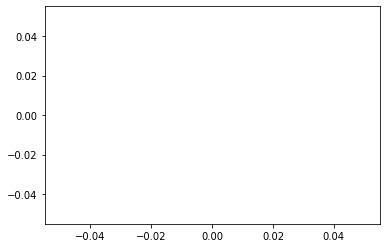

In [95]:
# Model training    
model_1 = LogisticRegression(0.001,100000 )

model_1.fit( x_train, y_train )    


# Prediction on test set
y_pred = model_1.predict( x_test )    


# measure performance    
c_classified = 0    


# counter    
i = 0    
for i in range( np.size( y_pred ) ) :  

    if y_test[i] == y_pred[i] :            
        c_classified = c_classified + 1


    i = i + 1

print( "Accuracy of the model:", ( c_classified / i*100))